<a href="https://colab.research.google.com/github/thetoby9944/awesometexturedatasets/blob/main/TensorFlow_Datasets_for_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

Install the library from pip or use github install to install the latest version

    pip install tfds_defect_detection

In [9]:
!pip uninstall tfds_defect_detection
!pip install git+https://github.com/thetoby9944/tfds_defect_detection.git@master -U


Found existing installation: tfds-defect-detection 0.1.0
Uninstalling tfds-defect-detection-0.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/tfds_defect_detection-0.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tfds_defect_detection/*
Proceed (y/n)? y
  Successfully uninstalled tfds-defect-detection-0.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/thetoby9944/tfds_defect_detection.git (to revision master) to /tmp/pip-req-build-iyf3d4py
  Running command git clone -q https://github.com/thetoby9944/tfds_defect_detection.git /tmp/pip-req-build-iyf3d4py
  Created wheel for tfds-defect-detection: filename=tfds_defect_detection-0.1.0-py3-none-any.whl size=96565 sha256=8a9fa9a1520add79020a0a13e0e2d99b79f06f68f0b0a6b4eac12b6ec2fcd902
  Stored in directory: /tmp/pip-ephem-wheel-cache-483a743l/wheels/45/b7/d0/cd347013966d50d4c44c6062ef00ee6a491afa6c42351dd019
Successfully built tfds

In [1]:
import tfds_defect_detection as tfd
import albumentations as A
from pathlib import Path

## Examples

### Start by loading the MVTEC dataset

5264982680/5264982680 [==============================] - 224s 0us/step
Preparing mvtec_download train_images


100%|██████████| 3629/3629 [00:26<00:00, 135.27it/s]


Preparing mvtec_download test_images and test_masks


100%|██████████| 1725/1725 [00:18<00:00, 92.72it/s]


Dataset shape: <PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


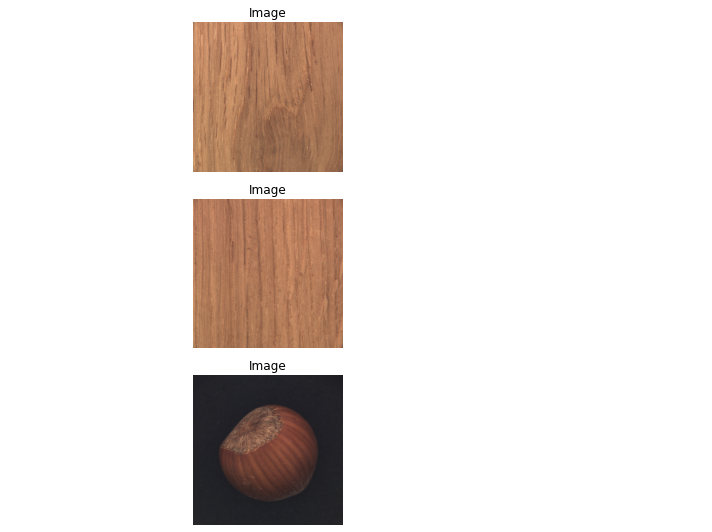

Instructions for updating:
Use `tf.data.Dataset.sample_from_datasets(...)`.


In [2]:
ds = tfd.load(names=["mvtec"], data_dir=Path("."), batch_size=3)

### Disable the preview

In [2]:
ds = tfd.load(names=["mvtec"], data_dir=Path("."), peek=False)


### Enable synthetic anomalies

Dataset shape: <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


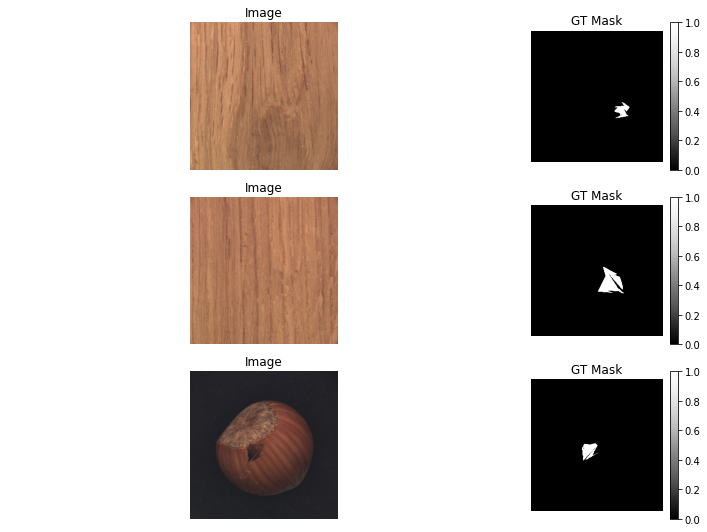

In [3]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    batch_size=3, 
    create_artificial_anomalies=True,  # <---
    drop_masks=False                   # <---
)


### Include original + synthetic defect

Dataset shape: <PrefetchDataset element_spec=((TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


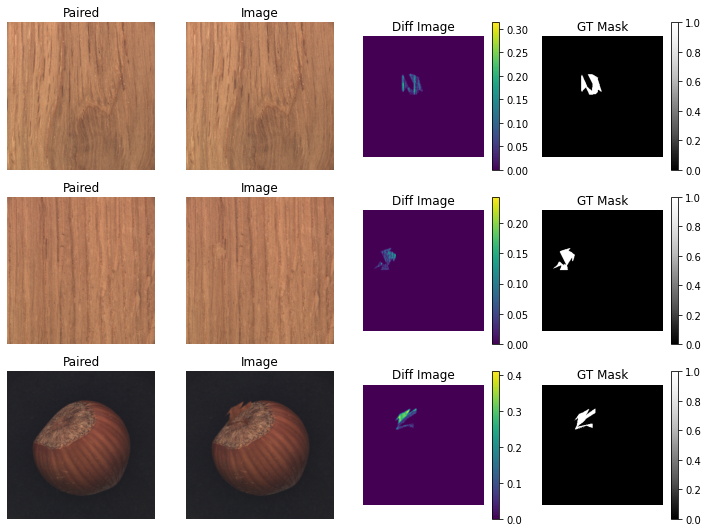

In [4]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    pairing_mode="result_with_original",  # <----
    create_artificial_anomalies=True, 
    batch_size=3, 
    drop_masks=False
)


## Include processed image and random image from same class - Contrastive Pairs

Dataset shape: <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


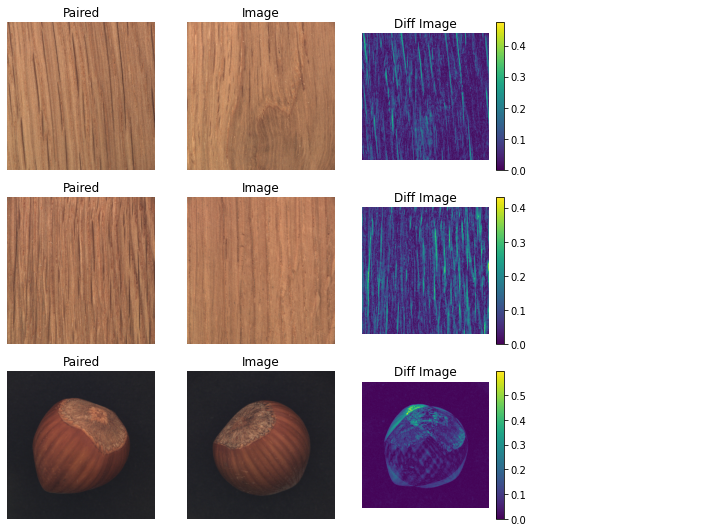

In [5]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."),
    pairing_mode="result_with_contrastive_pair",  # <---
    batch_size=3
)

## Contrastive Pairs with artificial defects

Dataset shape: <PrefetchDataset element_spec=((TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


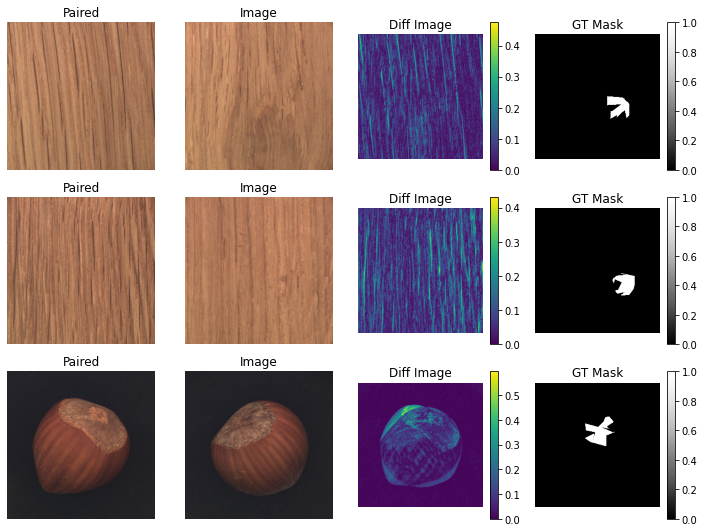

In [6]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    create_artificial_anomalies=True, 
    drop_masks=False,
    pairing_mode="result_with_contrastive_pair", 
    batch_size=3,
)

## Data augmentation

Global augmentation is applied on the paired image, whereas process_transform is applied on the result image that.

Dataset shape: <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


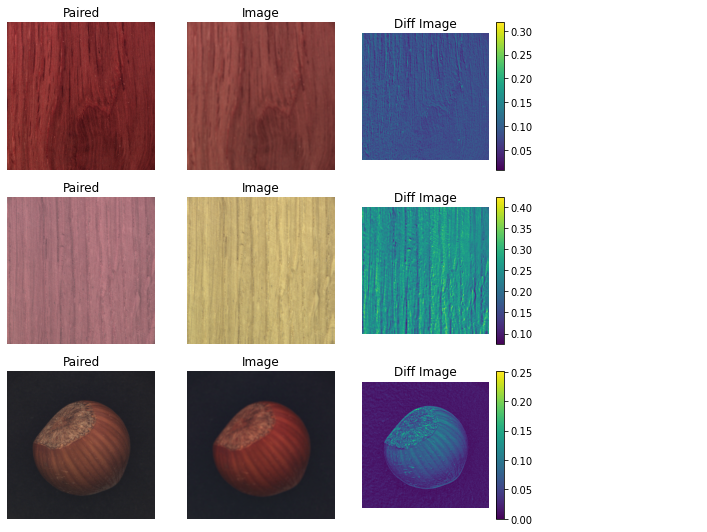

In [7]:
# import albumentations as A

aug_global = A.Compose([
  A.RandomBrightnessContrast(),
  A.HueSaturationValue(),
])

aug_process = A.Compose([
  A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.0, rotate_limit=1.5),
  A.Blur(blur_limit=3),
  A.RandomBrightnessContrast(),
  A.RandomGamma(),
  A.HueSaturationValue(),
])


ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    pairing_mode="result_with_original", 
    batch_size=3,
    global_transform=aug_global,          # <----
    process_deviation=aug_process,        # <----
)

## Artifical Defect Transforms

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1641: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


Dataset shape: <PrefetchDataset element_spec=((TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


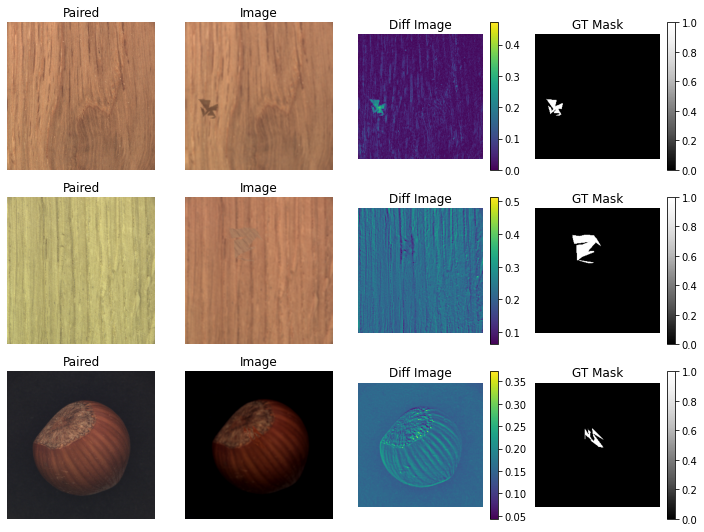

In [8]:
aug_defect = A.Compose([
  A.RandomRotate90(),
  A.Transpose(),
  A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=1),
  A.RandomGamma(),
  A.OpticalDistortion(),
  A.GridDistortion(),
  A.RandomContrast(0.5, p=1),
])

ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    pairing_mode="result_with_original", 
    batch_size=3,
    global_transform=aug_global,        
    process_deviation=aug_process,
    anomaly_composition=aug_defect,    # <----
    create_artificial_anomalies=True,
    drop_masks=False,
)

## Choose different image sizes

Dataset shape: <PrefetchDataset element_spec=TensorSpec(shape=(None, 312, 512, 3), dtype=tf.float32, name=None)>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


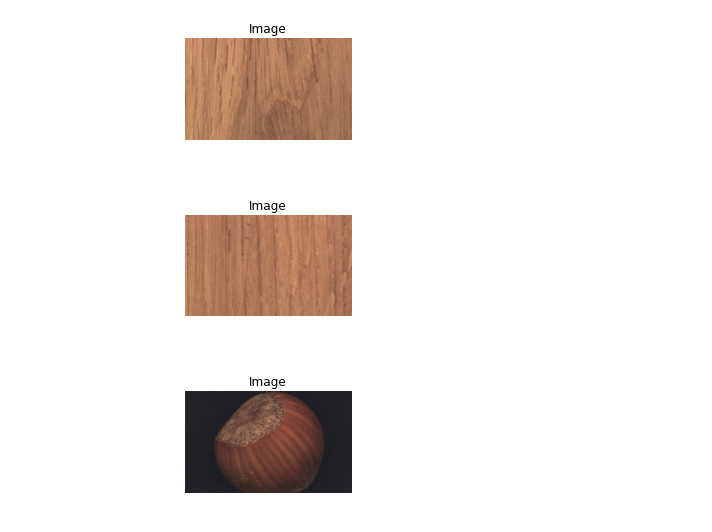

In [4]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    batch_size=3,
    width=312, 
    height=512,
    crop_to_aspect_ratio=True
)


## Choose splits

Dataset shape: <PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>
Uses 725 of 3629 images from mvtec/train_images
Here is the first batch


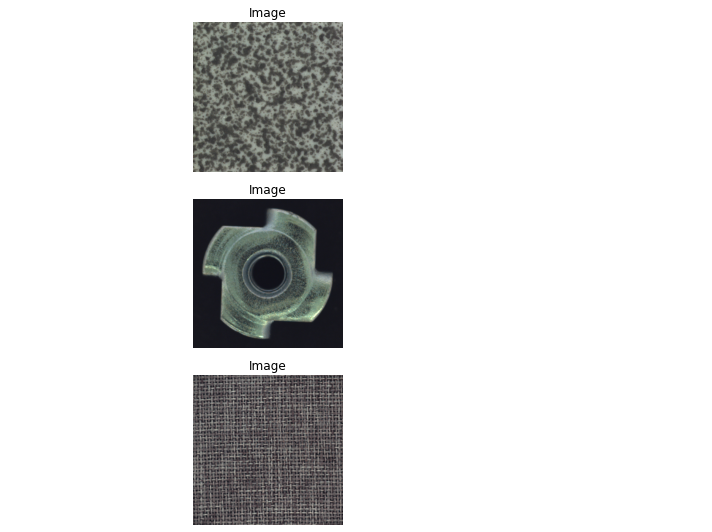

In [5]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    batch_size=3,
    subset_mode="validation"   # <---
)


## Access hand labelled true evaluation data

Dataset shape: <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 1380 of 1725 images from mvtec/test_images
Here is the first batch


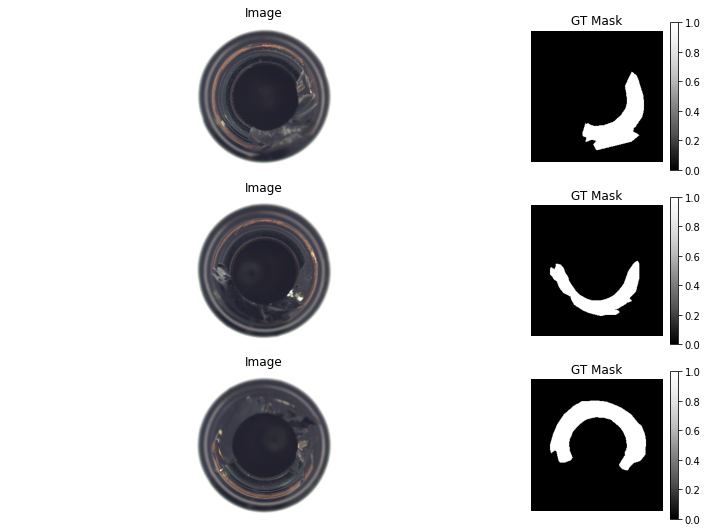

In [11]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    batch_size=3,
    subset_mode="test",    # <---
    drop_masks=False,      # <---
    shuffle=False
)


## Change the train/validation and test/holdout split


Dataset shape: <PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>
Uses 362 of 3629 images from mvtec/train_images
Here is the first batch


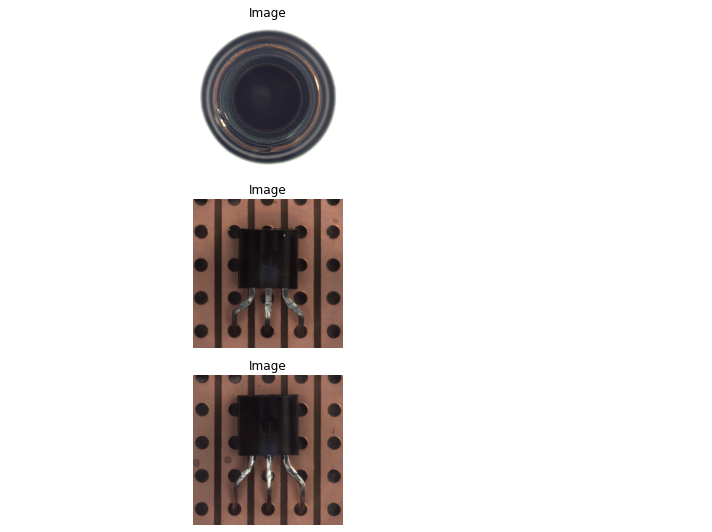

In [12]:
ds = tfd.load(
    names=["mvtec"], 
    data_dir=Path("."), 
    batch_size=3,
    validation_split=0.1,    # <---
    subset_mode="validation"
)


## Access more data, i.e. the visual anomalies - *VisA* dataset

Dataset shape: <PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>
Uses 6927 of 8659 images from visa/train_images
Here is the first batch


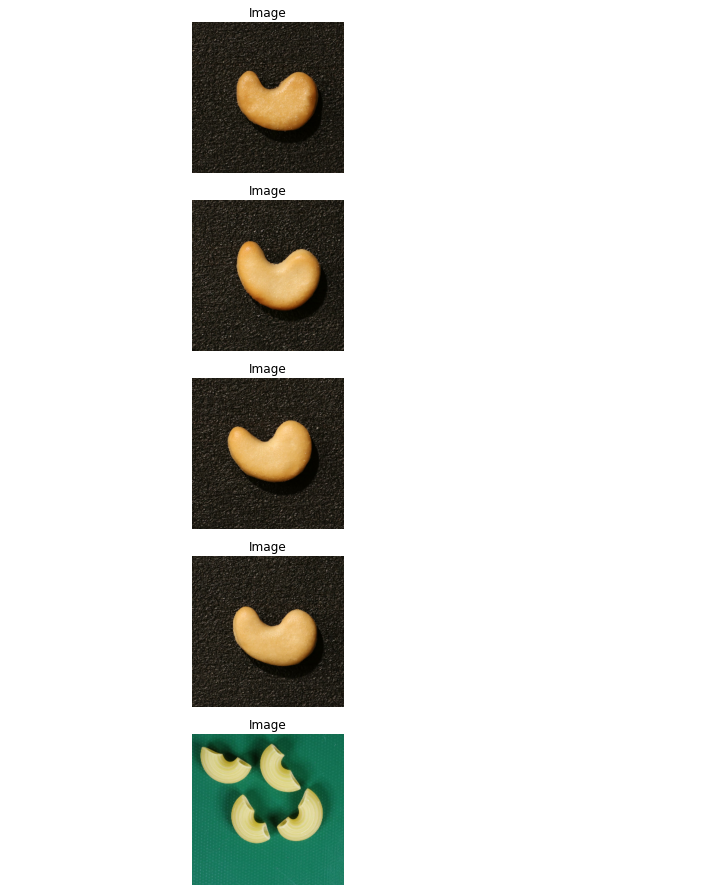

In [8]:
ds = tfd.load(
    names=["visa"], 
    data_dir=Path("."), 
    batch_size=5,
    crop_to_aspect_ratio=True,
)


## More handlabelled data - including the VisA dataset

Dataset shape: <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 1729 of 2162 images from visa/test_images
Here is the first batch


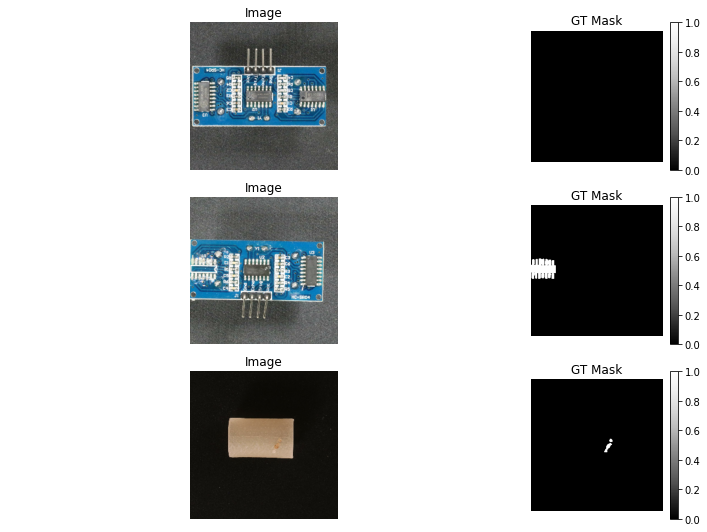

In [9]:
ds = tfd.load(
    names=["visa"], 
    data_dir=Path("."), 
    batch_size=3,
    subset_mode="test",
    drop_masks=False,
    crop_to_aspect_ratio=True
)


## Full example of all parameters

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1641: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


Dataset shape: <PrefetchDataset element_spec=((TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 2903 of 3629 images from mvtec/train_images
Here is the first batch


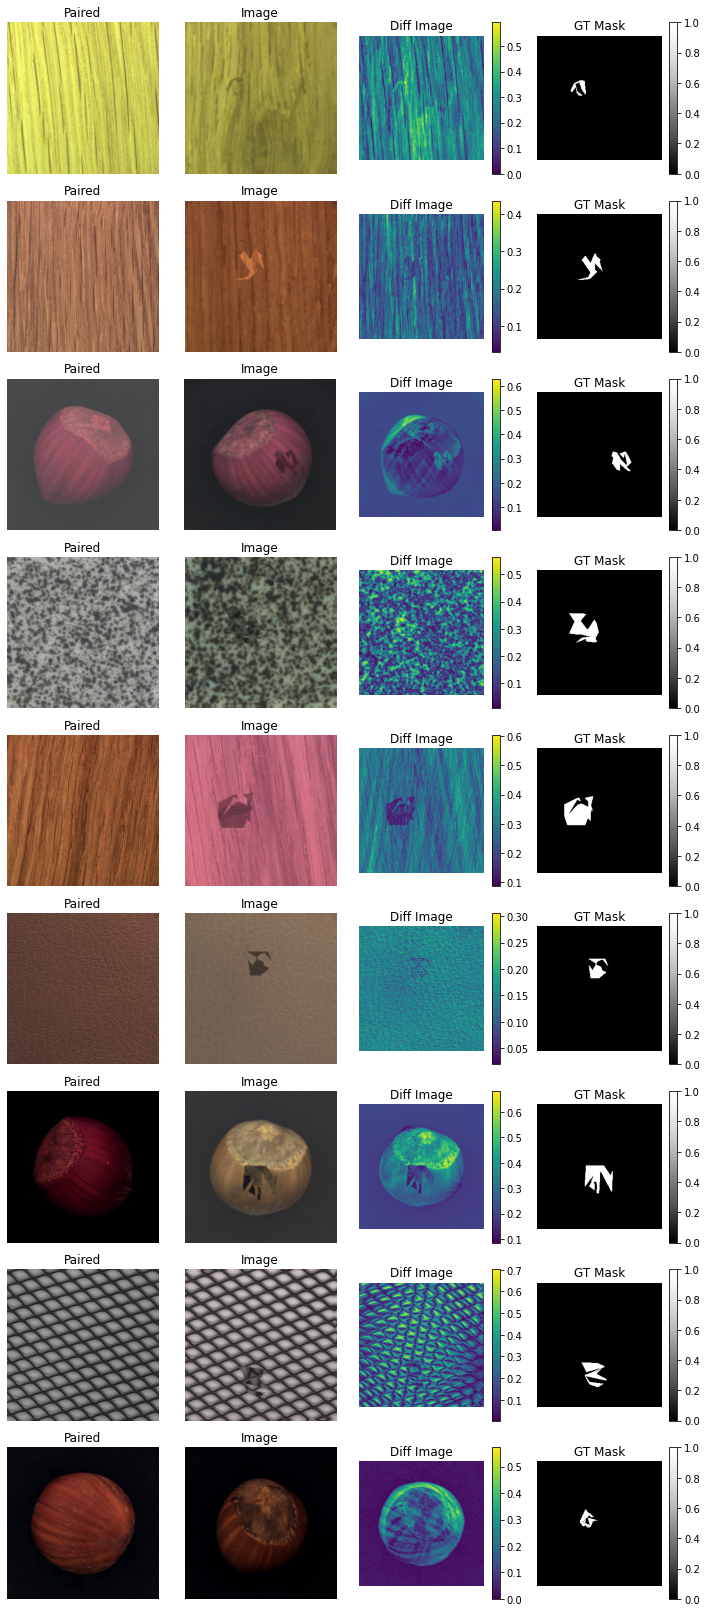

Dataset shape: <PrefetchDataset element_spec=((TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 256, 256, 2), dtype=tf.float32, name=None))>
Uses 6927 of 8659 images from visa/train_images
Here is the first batch


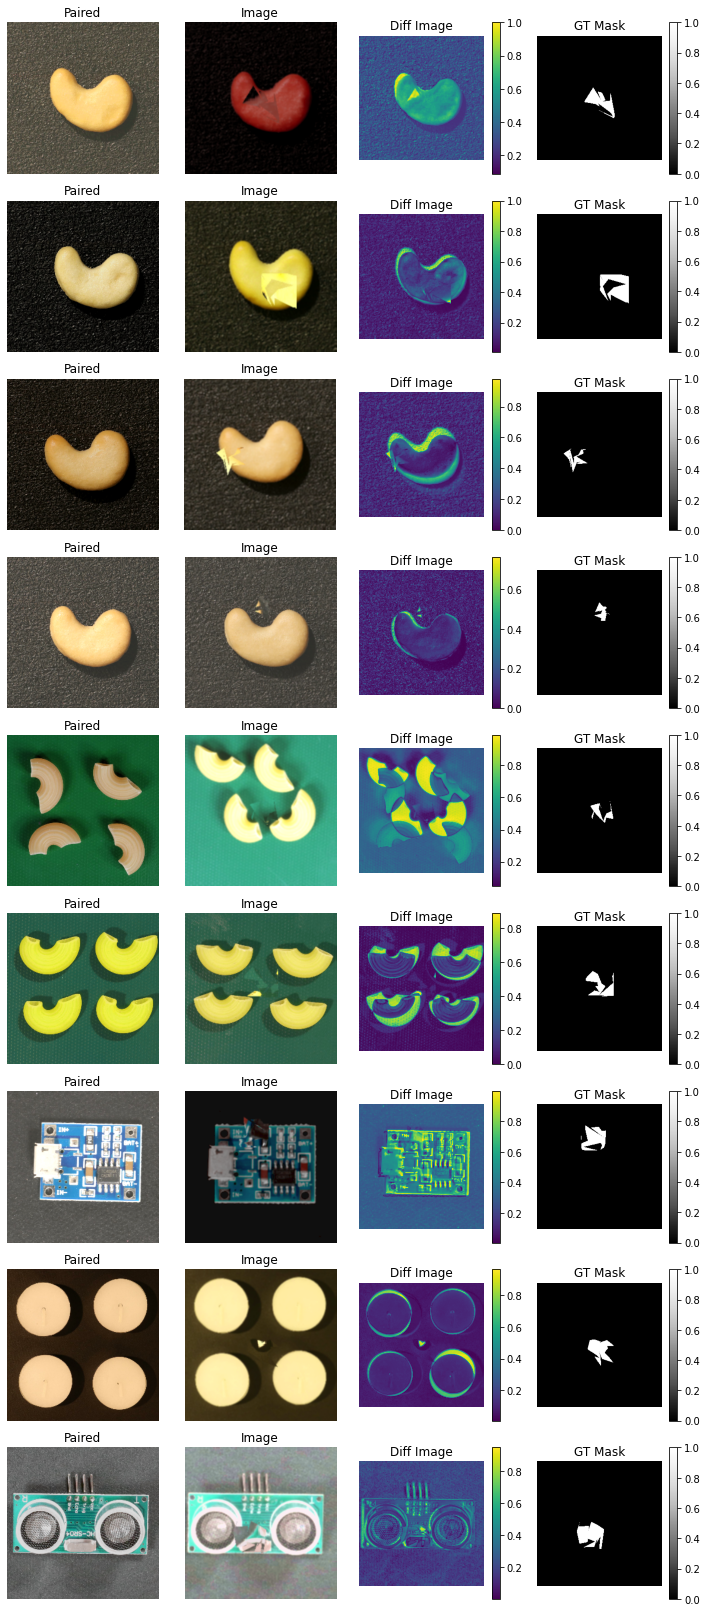

In [10]:
ds = tfd.load(
    names = ("mvtec", "visa"),
    data_dir=Path("."),
    pairing_mode = "result_with_contrastive_pair",  # "result_only", "result_with_original"
    create_artificial_anomalies=True,
    validation_split=0.2,
    subset_mode = "training",                       # "validation", "test", "holdout", None
    drop_masks=False,
    width=256,
    height=256,
    repeat=True,
    anomaly_size = None,

    global_transform=A.Compose([
      A.RandomBrightnessContrast(),
      A.HueSaturationValue(),
    ]),

    process_deviation=A.Compose([
      A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.0, rotate_limit=1.5, p=1),
      A.Blur(blur_limit=3),
      A.RandomBrightnessContrast(),
      A.RandomGamma(),
      A.HueSaturationValue(),
    ]),

    anomaly_composition=A.Compose([
      A.RandomRotate90(),
      A.Transpose(),
      A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=1),
      A.RandomGamma(),
      A.OpticalDistortion(),
      A.GridDistortion(),
      A.RandomContrast(0.5, p=1),
    ]),

    batch_size=9,
    seed=123,
    shuffle=True,
    peek=True,
    image_validation=False,
    delete_tmp=True,
    crop_to_aspect_ratio=True
)

In [ ]:
%%shell 
jupyter nbconvert --to html "TensorFlow_Datasets_for_Defect_Detection.ipynb"

In [7]:
!rm -rf visa